In [1]:
from cuota.importers.import_tax_data import \
    get_income_tax_bands, get_social_security_bands, get_spanish_regimen_general, get_spanish_data_by_year
from cuota.data_classes.tax_rules import BandsGroup, TaxModel
from cuota.logic.comparators import Comparator
from cuota.logic.calculations import Calculator


In [13]:
regimen_general = get_spanish_regimen_general()

In [4]:
reta = get_spanish_data_by_year()

In [49]:
comp_rg = Comparator(regimen_general)
comp_re = Comparator(reta)
comps = [comp_rg, comp_re]
names = ["Régimen General", "Régimen Especial Trabajador Autónomo"]
cols = [list(comp.dfs[0].columns) for comp in comps]
data = zip(comps, names, cols)

In [94]:
def plotter(df, year, axs, row, col_no, col):
    if df[col].max() > 10000:
        axs[col_no, row].plot(df.index, df.index)
    axs[col_no, row].plot(df.index, df[col], label=year)
    # axs[col_no, row].title(f"{col}")

In [78]:
import matplotlib.pyplot as plt

/var/folders/lw/5cn3fkrn7_l_dfbd6s653yxr0000gn/T/ipykernel_18364/1357473261.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


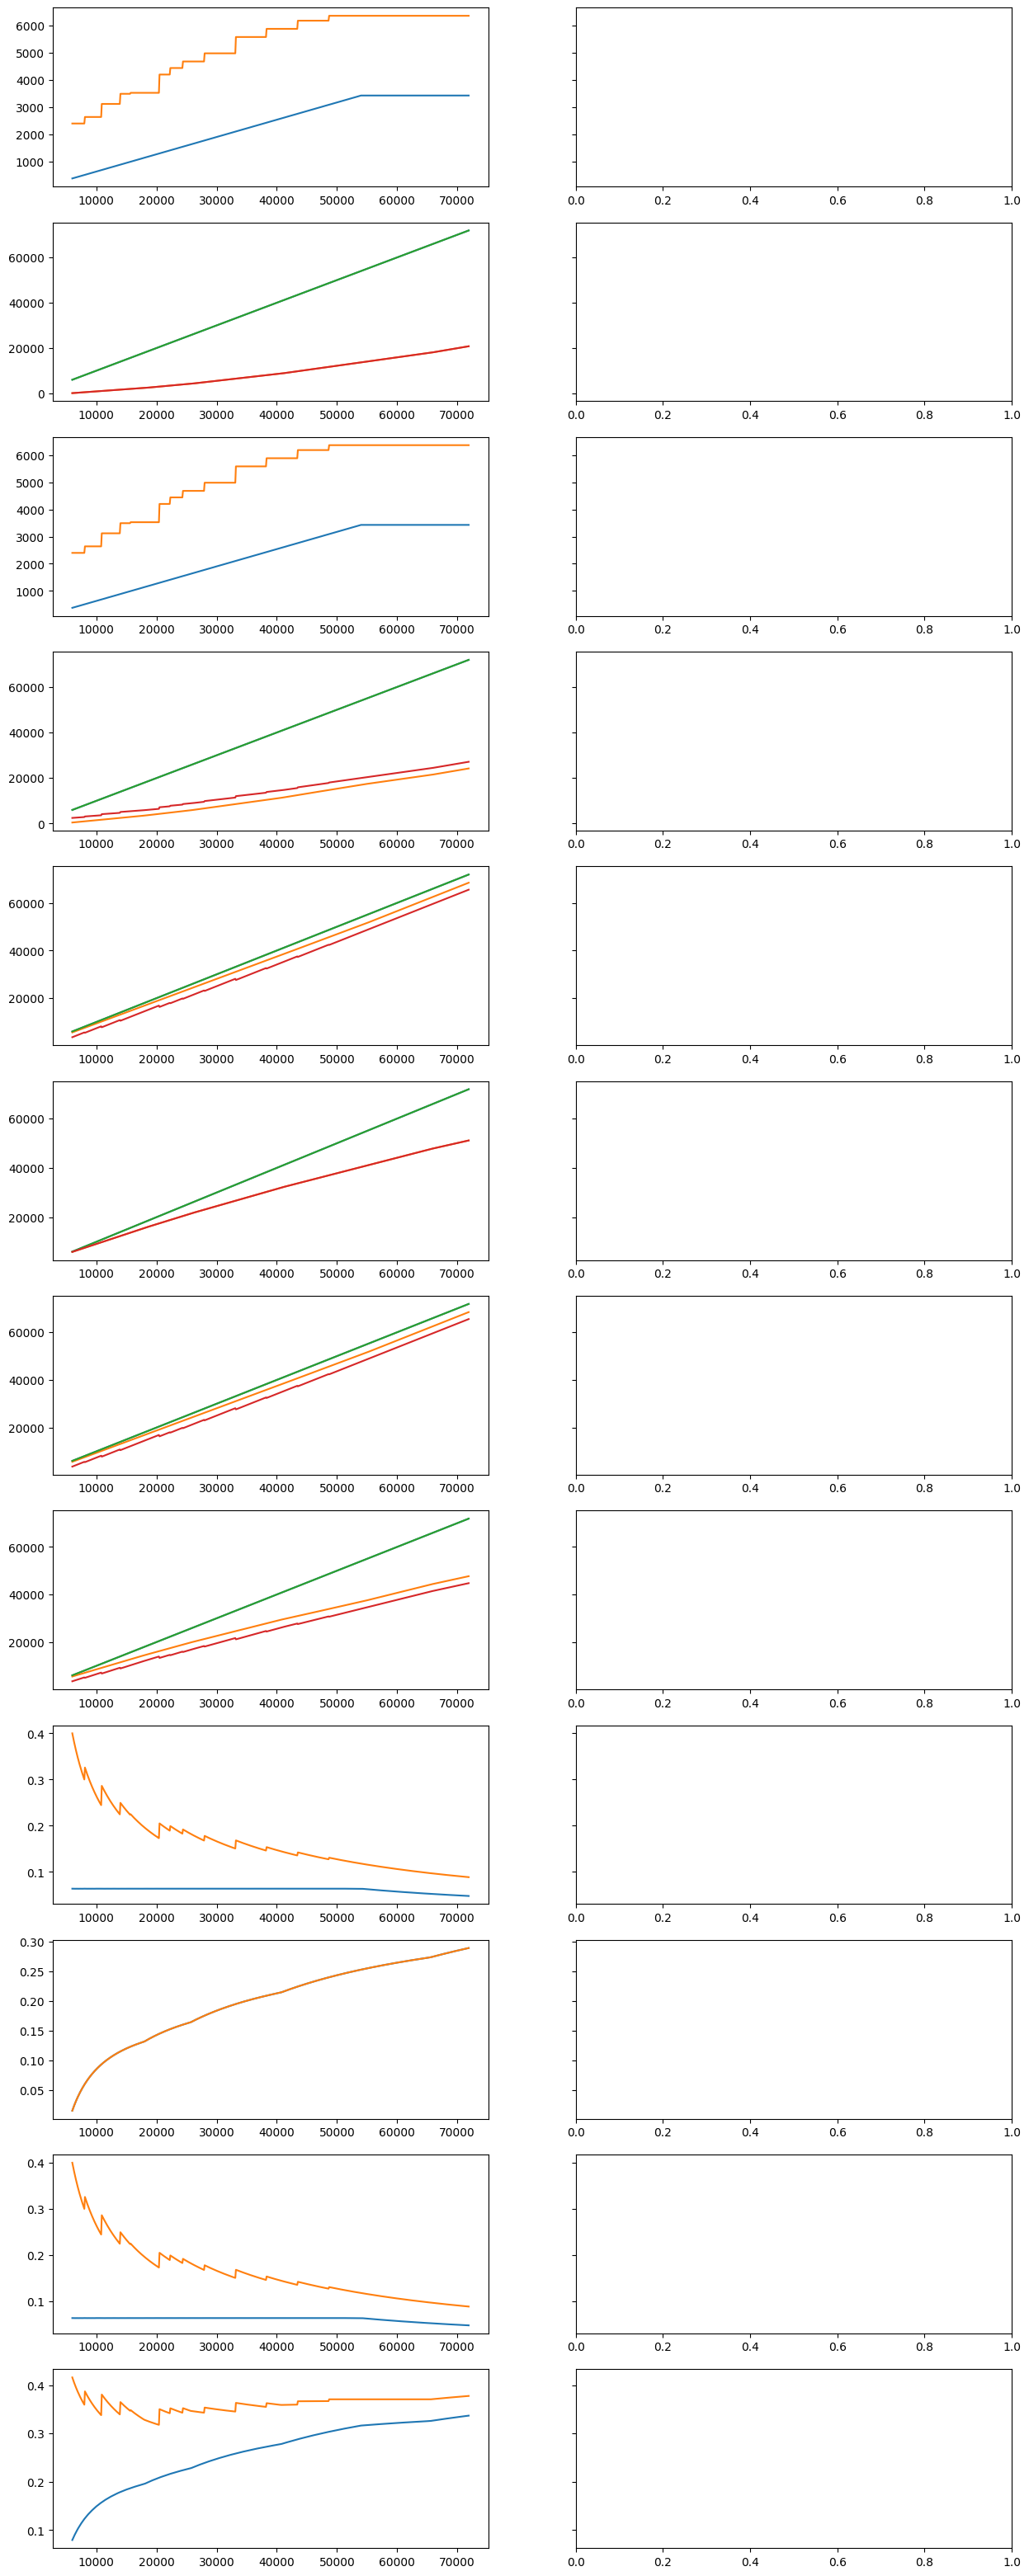

In [101]:
fig, axs = plt.subplots(12, 2, figsize=(15,40
                                       ), sharey="row")
comp_rg = Comparator(regimen_general)
comp_re = Comparator(reta)
comps = [comp_rg, comp_re]
names = ["Régimen General", "Régimen Especial Trabajador Autónomo"]
data = zip(comps, names)
for row, (comp, name) in enumerate(data):
    cols = list(comp.dfs[0].columns)
    for col_no, col in enumerate (cols):
        for df, year in zip(comp.dfs, comp.years):
            if year == 2025:
                #plotter(df, year, axs, row, col_no, col)
                plotter(df, year, axs, 0, col_no, col)
fig.show()

In [37]:
df = comps[0].dfs[0]
print(df.columns)
plotter(comps[0].dfs[0], rule, metric, axs, row, col)

MultiIndex([('Régimen General',               'payable'),
            (     'Income Tax',               'payable'),
            ('Régimen General',   'payable in sequence'),
            (     'Income Tax',   'payable in sequence'),
            ('Régimen General',    'net of this metric'),
            (     'Income Tax',    'net of this metric'),
            ('Régimen General',       'net in sequence'),
            (     'Income Tax',       'net in sequence'),
            ('Régimen General',        'effective rate'),
            (     'Income Tax',        'effective rate'),
            ('Régimen General', 'effective in sequence'),
            (     'Income Tax', 'effective in sequence')],
           )


KeyError: ('Social Security', 'payable')

In [35]:
for col, comp in enumerate(comps):
    for row, metric in enumerate(cols2):
        for row2, rule in enumerate(cols1):
            for df, year in zip(comp.dfs, comp.years):
                plotter(df, rule, metric, axs, row, col)

KeyError: ('Social Security', 'payable')

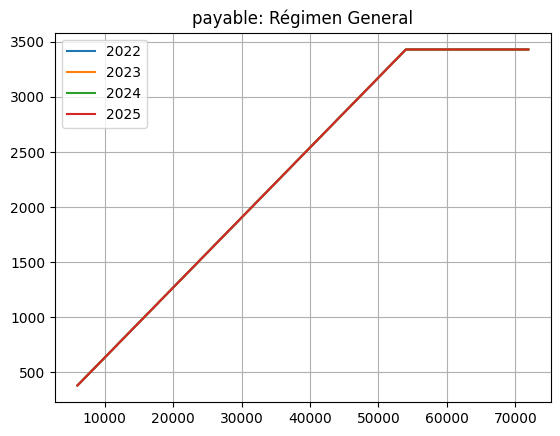

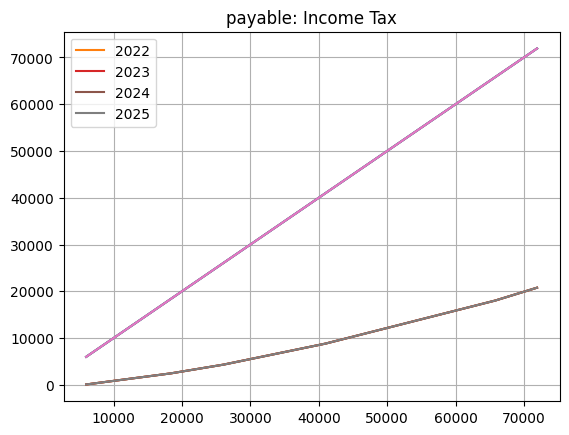

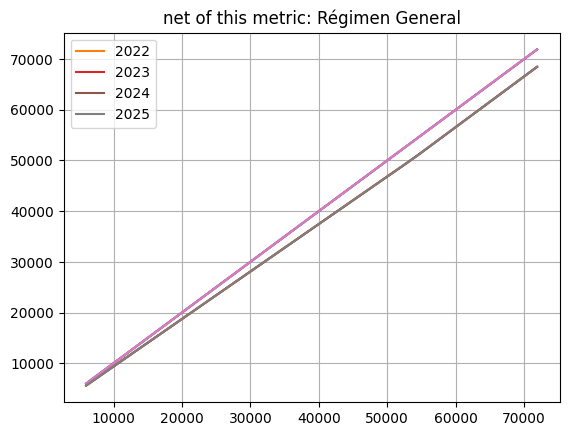

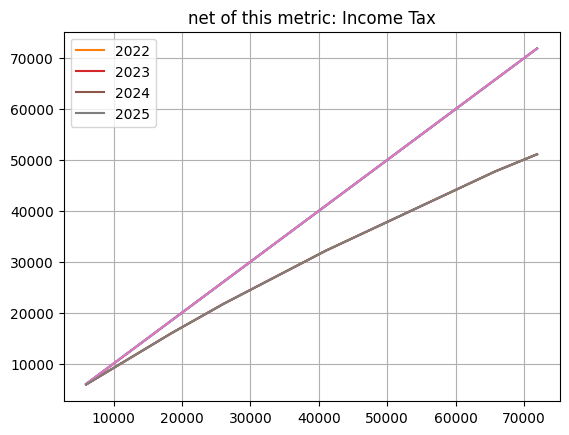

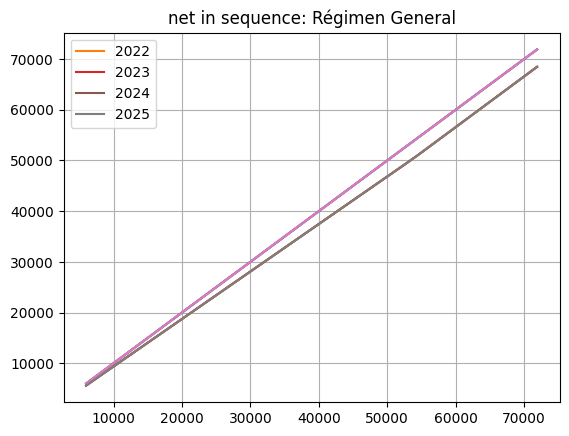

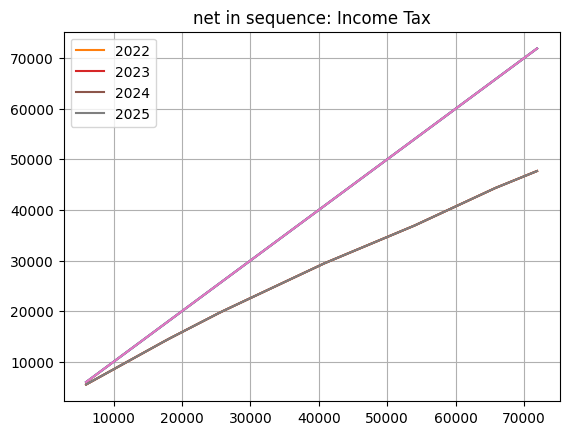

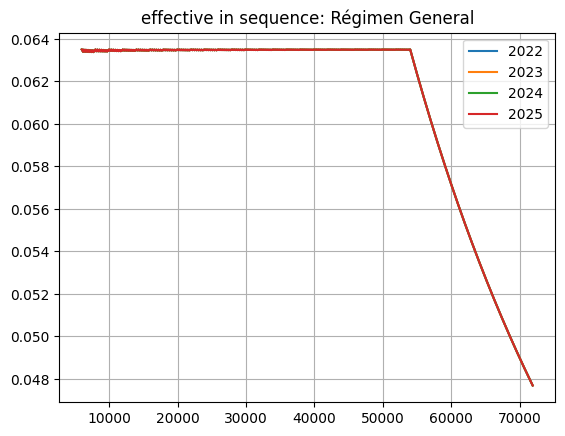

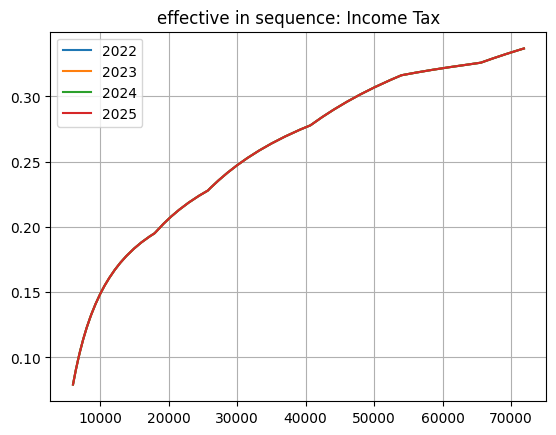

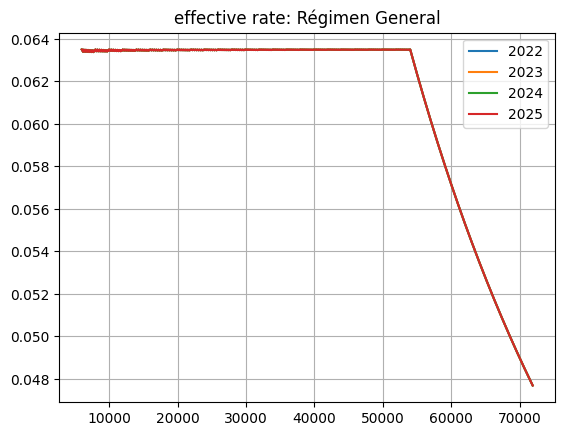

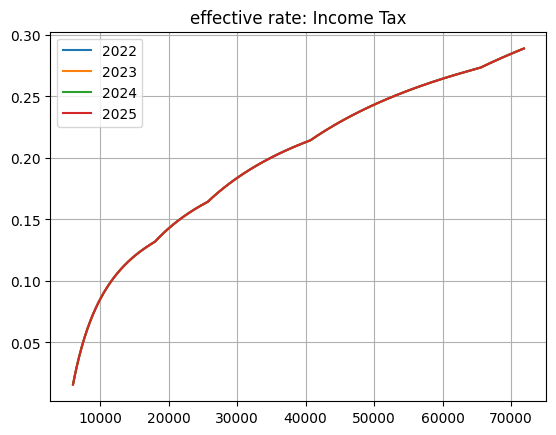

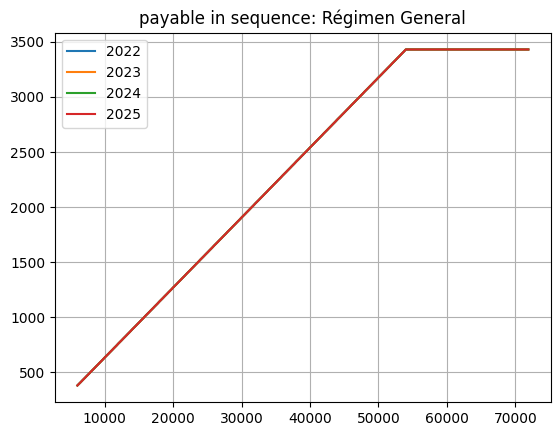

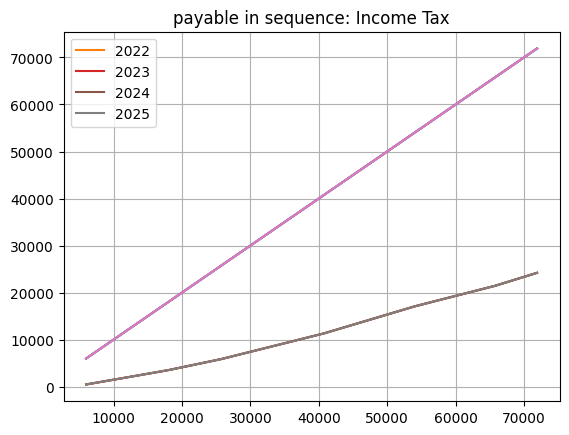

In [20]:
for metric in cols2:
    for rule in cols1:
        for df, year in zip(comp.dfs, comp.years):
            if df[(rule, metric)].max() > 10000:
                plt.plot(df.index, df.index)
            plt.plot(df.index, df[(rule, metric)], label=year)
            plt.title(f"{metric}: {rule}")
        plt.legend()
        plt.grid()
        plt.show()